<a href="https://colab.research.google.com/github/sumitsidana/uplimit_fine_tuning/blob/main/argilla_annotate_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring LLM Dataset Creation and Evaluation

## Install the required libraries

In [ ]:
%%bash
pip install -qqq huggingface-hub argilla "distilabel[huggingface]" accelerate openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.7/157.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.2/442.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.3 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
import argilla as rg
from google.colab import userdata

# Authenticate with Argilla
dataset = load_dataset("DIBT/10k_prompts_ranked")
column_names = dataset["train"].column_names
print(column_names)

/usr/local/lib/python3.10/dist-packages/argilla/_api/_token.py:83: UserWarning: 
The secrets ARGILLA_API_URL and does not exist in your Colab secrets.
  warnings.warn(f"\nThe secrets {name} and does not exist in your Colab secrets.")
/usr/local/lib/python3.10/dist-packages/argilla/_api/_token.py:83: UserWarning: 
The secrets ARGILLA_API_KEY and does not exist in your Colab secrets.
  warnings.warn(f"\nThe secrets {name} and does not exist in your Colab secrets.")
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.58M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10331 [00:00<?, ? examples/s]

['prompt', 'quality', 'metadata', 'avg_rating', 'num_responses', 'agreement_ratio', 'raw_responses', 'kind', 'cluster_description', 'topic']


In [ ]:
dataset['train'][0]

{'prompt': 'Provide step-by-step instructions on how to make a safe and effective homemade all-purpose cleaner from common household ingredients. The guide should include measurements, tips for storing the cleaner, and additional variations or scents that can be added. Additionally, the guide should be written in clear and concise language, with helpful visuals or photographs to aid in the process.',
 'quality': [{'user_id': 'd23b12c2-b601-490e-b5b3-2040eb393a00',
   'value': '4',
   'status': 'submitted'},
  {'user_id': 'e2bdd868-f28e-46fc-9254-a6ec1e291889',
   'value': '4',
   'status': 'submitted'}],
 'metadata': '{"source": "ultrachat", "kind": "synthetic", "evolved_from": null}',
 'avg_rating': 5.0,
 'num_responses': 2,
 'agreement_ratio': 1.0,
 'raw_responses': [5, 5],
 'kind': 'synthetic',
 'cluster_description': 'Sustainable Packaging & Skin Care Products',
 'topic': 'Environmental Issues'}

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/handlers.py", line 1475, in emit
    self.enqueue(self.prepare(record))
  File "/usr/lib/python3.10/logging/handlers.py", line 1436, in enqueue
    self.queue.put_nowait(record)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 138, in put_nowait
    return self.put(obj, False)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 88, in put
    raise ValueError(f"Queue {self!r} is closed")
ValueError: Queue <multiprocessing.queues.Queue object at 0x794d0661f1c0> is closed
Call stack:
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/

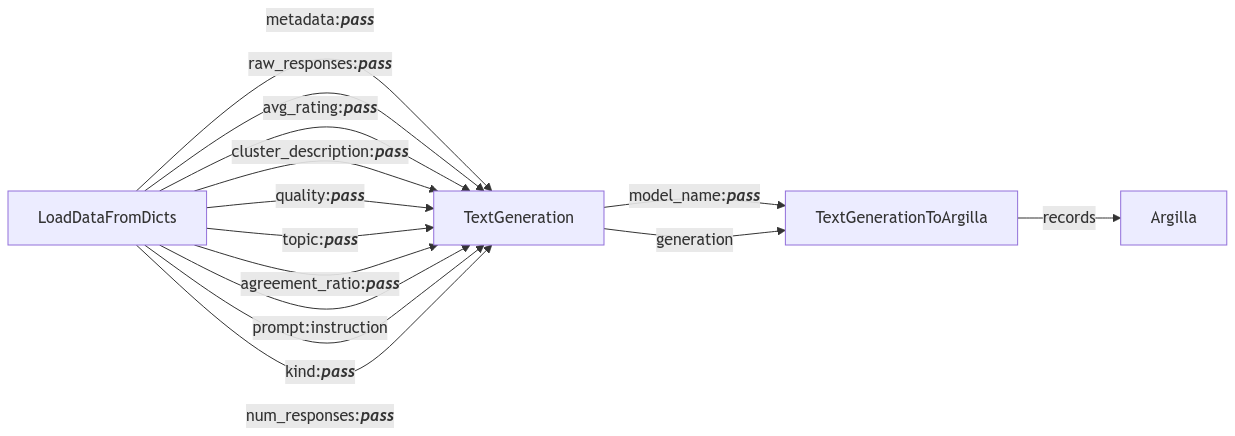

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/argilla/_exceptions/_api.py:91 in _handler_wrapper       │
│                                                                                                  │
│   88 │                                                                                           │
│   89 │   def _handler_wrapper(*args, **kwargs):                                                  │
│   90 │   │   try:                                                                                │
│ ❱ 91 │   │   │   return func(*args, **kwargs)                                                    │
│   92 │   │   except HTTPStatusError as e:                                                        │
│   93 │   │   │   _error_switch(status_code=e.response.status_code, error_detail=e.response.te    │
│   94                                                                                             │
│                                                                                                  │
│ ╭────────────────────────────────── locals ───────────────────────────────────╮                  │
│ │   args = (                                                                  │                  │
│ │          │   <argilla._api._datasets.DatasetsAPI object at 0x794b9c744160>, │                  │
│ │          │   DatasetModel(                                                  │                  │
│ │          │   │   id=None,                                                   │                  │
│ │          │   │   inserted_at=None,                                          │                  │
│ │          │   │   updated_at=None,                                           │                  │
│ │          │   │   name='DIBT_10k_prompts',                                   │                  │
│ │          │   │   status='draft',                                            │                  │
│ │          │   │   guidelines=None,                                           │                  │
│ │          │   │   allow_extra_metadata=True,                                 │                  │
│ │          │   │   distribution=None,                                         │                  │
│ │          │   │   workspace_id=UUID('040c9644-028a-48ed-a21f-88bccd16c2d7'), │                  │
│ │          │   │   last_activity_at=None                                      │                  │
│ │          │   )                                                              │                  │
│ │          )                                                                  │                  │
│ │ kwargs = {}                                                                 │                  │
│ ╰─────────────────────────────────────────────────────────────────────────────╯                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/argilla/_api/_datasets.py:45 in create                   │
│                                                                                                  │
│    42 │   │   │   url=self.url_stub,                                                             │
│    43 │   │   │   json=json_body,                                                                │
│    44 │   │   )                                                                                  │
│ ❱  45 │   │   response.raise_for_status()                                                        │
│    46 │   │   response_json = response.json()                                                    │
│    47 │   │   dataset = self._model_from_json(response_json=response_json)                       │
│    48 │   │   self._log_message(message=f"Created dataset {dataset.name}")                       │
│                                                            

In [ ]:
import argilla as rg

# Initialize Argilla client
api_url = userdata.get('ARGILLA_API_URL')  # or os.environ if you are not using Google Colab
api_key = userdata.get("ARGILLA_API_KEY")  # or os.environ if you are not using Google Colab
workspace = "argilla"
dataset_name = "DIBT_10k_prompts"

# Initialize the Argilla client
client = rg.Argilla(api_url=api_url, api_key=api_key)

# Create a new Dataset
dataset = rg.Dataset(
    name=dataset_name,
    workspace=workspace,
    client=client
)

# Configure the dataset settings
dataset.settings.fields = [
    rg.TextField(name="id"),
    rg.TextField(name="instruction"),
    rg.TextField(name="generation"),
]

dataset.settings.questions = [
    rg.LabelQuestion(
        name="quality",
        labels=["👎", "👍"],
        title="Quality of the generated text",
    )
]

# Create the dataset on the server
dataset.create()

print(f"New dataset '{dataset_name}' created in workspace '{workspace}'")

In [ ]:
from huggingface_hub import snapshot_download
from transformers import AutoTokenizer, AutoModelForCausalLM
import os
from pathlib import Path

# Set the model name
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

# Set the directory where you want to save the model
local_model_path = "/content/tinyllama-1.1b-chat"

# Download the model
print(f"Downloading {model_name} to {local_model_path}...")
snapshot_download(repo_id=model_name, local_dir=local_model_path)

# Load the tokenizer and model to verify the download
print("Loading the model to verify the download...")
tokenizer = AutoTokenizer.from_pretrained(local_model_path)
model = AutoModelForCausalLM.from_pretrained(local_model_path)

print(f"Model {model_name} has been successfully downloaded and loaded.")

# Print the size of the downloaded model
total_size = sum(f.stat().st_size for f in Path(local_model_path).glob('**/*') if f.is_file())
print(f"Total size of the downloaded model: {total_size / 1e9:.2f} GB")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

eval_results.json:   0%|          | 0.00/566 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

Loading the model to verify the download...
Model TinyLlama/TinyLlama-1.1B-Chat-v1.0 has been successfully downloaded and loaded.
Total size of the downloaded model: 2.20 GB


In [ ]:
# Filter the dataset to pick the highest quality responses
filtered_dataset = load_dataset("DIBT/10k_prompts_ranked", split="train").filter(
    lambda r: float(r["avg_rating"]) >= 4 and int(r["num_responses"]) >= 2
)

Filter:   0%|          | 0/10331 [00:00<?, ? examples/s]

In [ ]:
# View the features of your filtered dataset
filtered_dataset.features

{'prompt': Value(dtype='string', id='field'),
 'quality': [{'user_id': Value(dtype='string', id='question'),
   'value': Value(dtype='string', id='suggestion'),
   'status': Value(dtype='string', id='question')}],
 'metadata': Value(dtype='string', id='metadata'),
 'avg_rating': Value(dtype='float64', id=None),
 'num_responses': Value(dtype='int64', id=None),
 'agreement_ratio': Value(dtype='float64', id=None),
 'raw_responses': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'kind': Value(dtype='string', id=None),
 'cluster_description': Value(dtype='string', id=None),
 'topic': Value(dtype='string', id=None)}

## Option A: Use local LLMs to create your pipelines

In [ ]:
from distilabel.llms import TransformersLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import (
    LoadDataFromDicts,
    TextGenerationToArgilla,
)
from distilabel.steps.tasks import TextGeneration
from datasets import load_dataset

# Subset your filtered dataset because of compute requirements. However, you can skip this step if you are not using a compute-constrained environment
filtered_dataset_12 = filtered_dataset.select(range(12))
filtered_dataset_12

Dataset({
    features: ['prompt', 'quality', 'metadata', 'avg_rating', 'num_responses', 'agreement_ratio', 'raw_responses', 'kind', 'cluster_description', 'topic'],
    num_rows: 12
})

In [ ]:
# Create the pipeline
with Pipeline(
    name="prefs-with-tinyllama",
    description="Pipeline for building preference datasets using TinyLlama",
) as pipeline:
    load_dataset = LoadDataFromDicts(
        name="load_dataset",
        data=filtered_dataset_12,
        output_mappings={"prompt": "instruction"},
    )
    text_generation = TextGeneration(
        name="text_generation",
        llm=TransformersLLM(
            model=local_model_path,
            device_map="auto",  # This will use available GPU(s) efficiently
            torch_dtype="auto",  # This will use the appropriate dtype for the model
            trust_remote_code=True,  # This may be necessary for some models
            model_kwargs={
                "low_cpu_mem_usage": True,  # This can help with memory issues
            },
        ),
    )

    to_argilla = TextGenerationToArgilla(
        name="text_generation_to_argilla",
        dataset_name=dataset_name,
        dataset_workspace=workspace,
    )
    load_dataset >> text_generation >> to_argilla

# Run the pipeline
distiset = pipeline.run(
    parameters={
        "load_dataset": {
            "batch_size": 16,
        },
        "text_generation": {
            "llm": {
                "generation_kwargs": {
                    "max_new_tokens": 512,
                    "temperature": 0.7,
                    "do_sample": True,
                    "top_p": 0.95,
                    "top_k": 50,
                }
            }
        },
        "text_generation_to_argilla": {
            "api_url": api_url,
            "api_key": api_key,
            "dataset_name": dataset_name,
            "dataset_workspace": workspace,
        },
    }
)

[11/02/24 01:14:49] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to                ]8;id=192281;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=113611;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#866\866]8;;\
                             '/root/.cache/distilabel/pipelines/prefs-with-tinyllama/1a440b4593dcf2dafb            
                             c5a3a48b5ca698109ed0e1/executions/556ffaeb852aad4914a4adcf6b937d0d2975ebf3            
                             /data/steps_outputs'                                                                  

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in     ]8;id=385768;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=625526;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#889\889]8;;\
                             stages:                                                                               
                              * Stage 0:                                                                           
                                - 'load_dataset'                                                                   
                                - 'text_generation'                                                                
                                - 'text_generation_to_argilla'                                                     

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=103617;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=288405;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1183\1183]8;;\
                             load...                                                                               

                    INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 1/3                 ]8;id=739377;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=534475;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'load_dataset' replicas: 1/1                                                       
                              * 'text_generation' replicas: 0/1                                                    
                              * 'text_generation_to_argilla' replicas: 0/1                                         

[11/02/24 01:14:50] INFO     ['root'] Argilla: Logged in as SumitSidana with the role owner          ]8;id=889396;file:///usr/local/lib/python3.10/dist-packages/argilla/_api/_client.py\_client.py]8;;\:]8;id=455511;file:///usr/local/lib/python3.10/dist-packages/argilla/_api/_client.py#147\147]8;;\

[11/02/24 01:14:56] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 2/3                 ]8;id=702706;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=289373;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'load_dataset' replicas: 1/1                                                       
                              * 'text_generation' replicas: 0/1                                                    
                              * 'text_generation_to_argilla' replicas: 1/1                                         

[11/02/24 01:14:58] INFO     ['accelerate.utils.modeling'] We will use 90% of the memory on device ]8;id=871537;file:///usr/local/lib/python3.10/dist-packages/accelerate/utils/modeling.py\modeling.py]8;;\:]8;id=513663;file:///usr/local/lib/python3.10/dist-packages/accelerate/utils/modeling.py#1086\1086]8;;\
                             0 for storing the model, and 10% for the buffer to avoid OOM. You can                 
                             set `max_memory` in to a higher value to use more memory (at your own                 
                             risk).                                                                                

[11/02/24 01:15:04] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 3/3                 ]8;id=648377;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=177054;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'load_dataset' replicas: 1/1                                                       
                              * 'text_generation' replicas: 1/1                                                    
                              * 'text_generation_to_argilla' replicas: 1/1                                         

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=286765;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=800984;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1220\1220]8;;\

                    INFO     ['distilabel.step.load_dataset'] 🧬 Starting yielding batches from ]8;id=407308;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=630666;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             generator step 'load_dataset'. Offset: 0                                              

                    INFO     ['distilabel.step.load_dataset'] 📨 Step 'load_dataset' sending    ]8;id=137080;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=68551;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             batch 0 to output queue                                                               

                    INFO     ['distilabel.step.load_dataset'] 🏁 Finished running step          ]8;id=115292;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=560632;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'load_dataset' (replica ID: 0)                                                        

                    INFO     ['distilabel.step.text_generation'] 📦 Processing batch 0 in       ]8;id=38846;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=903366;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             'text_generation' (replica ID: 0)                                                     

[11/02/24 01:15:39] INFO     ['distilabel.step.text_generation'] 📨 Step 'text_generation'      ]8;id=338936;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=758869;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation'] 🏁 Finished running step       ]8;id=742153;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=300316;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation' (replica ID: 0)                                                     

                    INFO     ['distilabel.step.text_generation_to_argilla'] 📦 Processing batch ]8;id=43770;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=215097;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             0 in 'text_generation_to_argilla' (replica ID: 0)                                     

Sending records...: 100%|██████████| 1/1 [00:00<00:00,  1.42batch/s]


[11/02/24 01:15:41] INFO     ['distilabel.step.text_generation_to_argilla'] 📨 Step             ]8;id=185488;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=242493;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             'text_generation_to_argilla' sending batch 0 to output queue                          

                    INFO     ['distilabel.step.text_generation_to_argilla'] 🏁 Finished running ]8;id=345358;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=91984;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             step 'text_generation_to_argilla' (replica ID: 0)                                     

Generating train split: 0 examples [00:00, ? examples/s]

## Option B: Use OpenAI LLM to create your pipeline

In [ ]:
from distilabel.llms import OpenAILLM
import os

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
# Create the pipeline
with Pipeline(
    name="prefs-with-openai",
    description="Pipeline for building preference datasets using OpenAI",
) as pipeline:
    load_dataset = LoadDataFromDicts(
        name="load_dataset",
        data=filtered_dataset_12,
        output_mappings={"prompt": "instruction"},
    )
    text_generation = TextGeneration(
        name="text_generation",
        llm=OpenAILLM(model="gpt-4")
    )

    to_argilla = TextGenerationToArgilla(
        name="text_generation_to_argilla",
        dataset_name=dataset_name,
        dataset_workspace=workspace,
    )
    load_dataset >> text_generation >> to_argilla

# Run the pipeline
distiset = pipeline.run(
    parameters={
        "load_dataset": {
            "batch_size": 16,
        },
        "text_generation": {
            "llm": {
                "generation_kwargs": {
                    "temperature": 0.7,
                }
            }
        },
        "text_generation_to_argilla": {
            "api_url": api_url,
            "api_key": api_key,
            "dataset_name": dataset_name,
            "dataset_workspace": workspace,
        },
    }
)

[11/02/24 01:16:05] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to                ]8;id=394426;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=526422;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#866\866]8;;\
                             '/root/.cache/distilabel/pipelines/prefs-with-openai/1a440b4593dcf2dafbc5a            
                             3a48b5ca698109ed0e1/executions/fca8fa8af37fc7509cc820e99b38e8113d89c984/da            
                             ta/steps_outputs'                                                                     

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in     ]8;id=160882;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=689451;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#889\889]8;;\
                             stages:                                                                               
                              * Stage 0:                                                                           
                                - 'load_dataset'                                                                   
                                - 'text_generation'                                                                
                                - 'text_generation_to_argilla'                                                     

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=152606;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=726929;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1183\1183]8;;\
                             load...                                                                               

                    INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 1/3                 ]8;id=577159;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=898629;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'load_dataset' replicas: 1/1                                                       
                              * 'text_generation' replicas: 0/1                                                    
                              * 'text_generation_to_argilla' replicas: 0/1                                         

[11/02/24 01:16:06] INFO     ['root'] Argilla: Logged in as SumitSidana with the role owner          ]8;id=766827;file:///usr/local/lib/python3.10/dist-packages/argilla/_api/_client.py\_client.py]8;;\:]8;id=264273;file:///usr/local/lib/python3.10/dist-packages/argilla/_api/_client.py#147\147]8;;\

[11/02/24 01:16:07] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 2/3                 ]8;id=831320;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=115940;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'load_dataset' replicas: 1/1                                                       
                              * 'text_generation' replicas: 1/1                                                    
                              * 'text_generation_to_argilla' replicas: 0/1                                         

[11/02/24 01:16:12] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 3/3                 ]8;id=863784;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=496053;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1216\1216]8;;\
                              * 'load_dataset' replicas: 1/1                                                       
                              * 'text_generation' replicas: 1/1                                                    
                              * 'text_generation_to_argilla' replicas: 1/1                                         

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=392124;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=582785;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/base.py#1220\1220]8;;\

                    INFO     ['distilabel.step.load_dataset'] 🧬 Starting yielding batches from ]8;id=19877;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=735267;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             generator step 'load_dataset'. Offset: 0                                              

                    INFO     ['distilabel.step.load_dataset'] 📨 Step 'load_dataset' sending    ]8;id=950320;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=82959;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             batch 0 to output queue                                                               

                    INFO     ['distilabel.step.load_dataset'] 🏁 Finished running step          ]8;id=978542;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=772158;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'load_dataset' (replica ID: 0)                                                        

                    INFO     ['distilabel.step.text_generation'] 📦 Processing batch 0 in       ]8;id=314587;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=541136;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             'text_generation' (replica ID: 0)                                                     

[11/02/24 01:16:19] INFO     ['distilabel.step.text_generation'] 📨 Step 'text_generation'      ]8;id=952748;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=327375;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation'] 🏁 Finished running step       ]8;id=265559;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=597188;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation' (replica ID: 0)                                                     

                    INFO     ['distilabel.step.text_generation_to_argilla'] 📦 Processing batch ]8;id=250668;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=171465;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#229\229]8;;\
                             0 in 'text_generation_to_argilla' (replica ID: 0)                                     

Sending records...: 100%|██████████| 1/1 [00:00<00:00,  1.83batch/s]


[11/02/24 01:16:21] INFO     ['distilabel.step.text_generation_to_argilla'] 📨 Step             ]8;id=919342;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=42196;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#289\289]8;;\
                             'text_generation_to_argilla' sending batch 0 to output queue                          

                    INFO     ['distilabel.step.text_generation_to_argilla'] 🏁 Finished running ]8;id=886912;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=824757;file:///usr/local/lib/python3.10/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             step 'text_generation_to_argilla' (replica ID: 0)                                     

Generating train split: 0 examples [00:00, ? examples/s]

## Install Eleuther Evaluation Harness

In [ ]:
%%bash
git clone https://github.com/EleutherAI/lm-evaluation-harness
cd lm-evaluation-harness
pip install -e .

Obtaining file:///content/lm-evaluation-harness
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.5 MB/s eta 

Cloning into 'lm-evaluation-harness'...


## Evaluate the LLM using Eleuther Evaluation Harness

In [ ]:
%%bash
lm_eval --model hf \
    --model_args pretrained=EleutherAI/pythia-160m,revision=step100000,dtype="float" \
    --tasks hellaswag \
    --device cuda \
    --batch_size auto:4 \
    --output_path hellaswag_test

Passed argument batch_size = auto:4.0. Detecting largest batch size
Determined largest batch size: 64
Passed argument batch_size = auto:4.0. Detecting largest batch size
Determined largest batch size: 64
hf (pretrained=EleutherAI/pythia-160m,revision=step100000,dtype=float), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: auto:4 (64,64,64,64,64)
|  Tasks  |Version|Filter|n-shot| Metric |   |Value |   |Stderr|
|---------|------:|------|-----:|--------|---|-----:|---|-----:|
|hellaswag|      1|none  |     0|acc     |↑  |0.2872|±  |0.0045|
|         |       |none  |     0|acc_norm|↑  |0.3082|±  |0.0046|



2024-11-02 01:19:28.511329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 01:19:28.639328: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 01:19:28.657455: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 01:19:28.706863: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-02 01:19:31.498661: W tensorflow/comp